<a href="https://colab.research.google.com/github/Djuikem/Master_Thesis_AIMS/blob/main/final_RNN_Lstm_GRU_Transformer_textual_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall -y gensim numpy
#!pip install numpy==1.24.3 gensim --no-cache-dir
# !pip install scipy==1.14.1 --no-cache-dir
# !pip uninstall -y gensim numpy
!pip install gensim numpy==2 scipy==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3


In [ ]:
!pip install scipy==1.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.12.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython import get_ipython
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,  roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec # ⚒️

import spacy


# 📌 Install necessary libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras cvxopt psutil

# 📌 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil  # For CPU and memory usage

# 📌 Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# 📌 TensorFlow/Keras imports
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Dropout, MultiHeadAttention, LayerNormalization, Input, Reshape, Add, SimpleRNN
from tensorflow.keras.optimizers import Adam
import cvxopt  # For optimization in SVM-based models

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Combined Data.csv')
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [ ]:
df.shape

(53043, 3)

In [ ]:
df, _ = train_test_split(df, test_size=0.8, random_state=42, stratify=df['status'])

In [ ]:
df.shape

(10608, 3)

In [ ]:
df['status'].unique()

array(['Normal', 'Suicidal', 'Depression', 'Anxiety',
       'Personality disorder', 'Bipolar', 'Stress'], dtype=object)

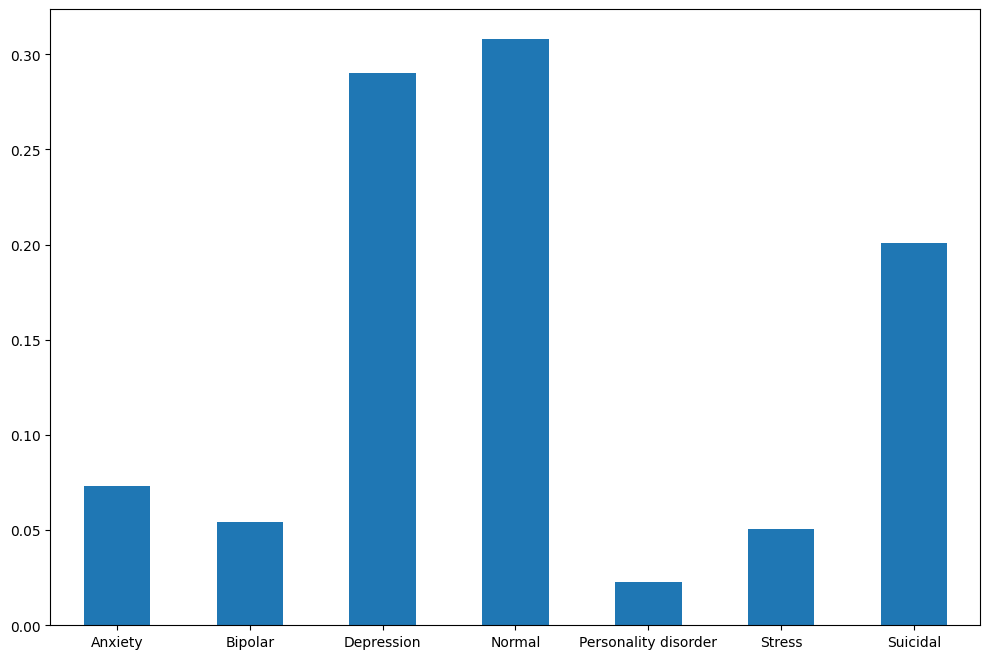

In [ ]:
bins, counts = np.unique(df['status'], return_counts=True)
freq_series = pd.Series(counts/len(df['statement']))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(bins, rotation=0)
plt.show()

In [ ]:
print("Unique value counts in the status column:")
print(df['status'].value_counts())

Unique value counts in the status column:
status
Normal                  3270
Depression              3081
Suicidal                2130
Anxiety                  778
Bipolar                  575
Stress                   534
Personality disorder     240
Name: count, dtype: int64


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the punkt_tab data package
nltk.download('punkt_tab')


# Load data
df = df.dropna(subset=['statement'])  # Drop rows with missing statements

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Train Word2Vec and Vectorize texts

In [ ]:
sentences = []
targets = []


for index in df.index:  # Iterate over the actual index values
  sentence = df.loc[index, 'statement']

  sentence = re.sub(r'[^\w\s]', '', sentence)
  temp = []
  words = word_tokenize(sentence)
  if len(words) > 3 and len(words) < 200:
    for j in word_tokenize(sentence):
        temp.append(j.lower())
    sentences.append(temp)
    targets.append(df.loc[index, 'status'])

print(sentences)

[['it', 'doesnt', 'matter', 'old', 'blades', 'cut', 'new', 'blades', 'cut'], ['doe', 'anybody', 'know', 'how', 'to', 'get', 'your', 'electrolyte', 'back', 'in', 'order', 'with', 'a', 'vitamin', 'work', 'i', 'feel', 'sick'], ['i', 'need', 'a', 'reason', 'to', 'keep', 'goinganything', 'please', 'help'], ['i', 'have', 'had', 'a', 'lot', 'of', 'support', 'from', 'my', 'family', 'except', 'from', 'my', 'bfs', 'family', 'and', 'he', 'himself', 'does', 'not', 'want', 'the', 'baby', 'i', 'have', 'had', 'a', 'lot', 'going', 'on', 'in', 'my', 'personal', 'life', 'where', 'people', 'have', 'tried', 'to', 'tear', 'me', 'down', 'and', 'rip', 'me', 'apart', 'and', 'its', 'to', 'the', 'point', 'where', 'i', 'feel', 'like', 'i', 'am', 'this', 'horrible', 'person', 'who', 'can', 'not', 'do', 'anything', 'right', 'i', 'feel', 'like', 'a', 'disappointment', 'to', 'everyone', 'including', 'my', 'baby', 'i', 'do', 'not', 'want', 'the', 'baby', 'to', 'have', 'a', 'suicidal', 'depressed', 'mother', 'like', '

In [ ]:
len(sentences)

8313

In [ ]:

# Train Word2Vec model
model = Word2Vec(sentences = sentences, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
'''# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    return np.array([model.wv[word] for word in sentence if word in model.wv])

# Transform your text data into vectors
#X = np.array([sentence_to_vector(text) for text in df['statement']])
X = [sentence_to_vector(text) for text in df['statement']]
'''

# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array, or an empty array if no words are found
    return np.array(vectors) if vectors else np.empty((0, model.vector_size))

# Find the maximum length of any sentence
max_length = max(len(sentence_to_vector(sentence)) for sentence in sentences)

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in sentences]


'''
# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array, or an empty array if no words are found
    return np.array(vectors) if vectors else np.empty((0, model.vector_size))

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]


# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array with zeros if no words are found, ensuring uniform shape
    if not vectors:
        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape
    # Pad or truncate vectors to match max_length
    vec = np.array(vectors)
    if vec.shape[0] < max_length:
        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')
    elif vec.shape[0] > max_length:
        vec = vec[:max_length]
    return vec

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]

# Convert to a NumPy array
X_padded = np.array(X)
'''

'''# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array with zeros if no words are found, ensuring uniform shape
    if not vectors:
        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape
    # Pad or truncate vectors to match max_length
    vec = np.array(vectors)
    if vec.shape[0] < max_length:
        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')
    elif vec.shape[0] > max_length:
        vec = vec[:max_length]
    return vec

# Find the maximum length of any sentence
max_length = max(len(sentence) for sentence in df['statement']) #  Get the maximum length of sentences

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]

# Convert to a NumPy array
X_padded = np.array(X)'''

"# Function to convert sentences to vectors\ndef sentence_to_vector(sentence):\n    vectors = [model.wv[word] for word in sentence if word in model.wv]\n    # Return a NumPy array with zeros if no words are found, ensuring uniform shape\n    if not vectors:\n        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape\n    # Pad or truncate vectors to match max_length\n    vec = np.array(vectors)\n    if vec.shape[0] < max_length:\n        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')\n    elif vec.shape[0] > max_length:\n        vec = vec[:max_length]\n    return vec\n\n# Find the maximum length of any sentence\nmax_length = max(len(sentence) for sentence in df['statement']) #  Get the maximum length of sentences\n\n# Transform your text data into vectors\nX = [sentence_to_vector(text) for text in df['statement']]\n\n# Convert to a NumPy array\nX_padded = np.array(X)"

In [ ]:
X[1].shape

(18, 100)

In [ ]:
# Padding or truncating sequences to ensure uniform length
#max_length = 5  # Define the maximum length of sequences
#X_padded = np.array([np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length] for vec in X])
'''
# Padding or truncating sequences to ensure uniform length
max_length = 200  # Define the maximum length of sequences
X_padded = []
for vec in X:
    if vec.size == 0:  # Check if the vector is empty
        padded_vec = np.zeros((max_length, 100))  # Create a zero-filled array
    else:
        padded_vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length]
    X_padded.append(padded_vec)
X_padded = np.array(X_padded)'''

# Padding or truncating sequences to ensure uniform length
X_padded = []
for vec in X:
    if vec.size == 0:  # Check if the vector is empty
        padded_vec = np.zeros((max_length, 100))  # Create a zero-filled array
    else:
        padded_vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length]
    X_padded.append(padded_vec)
X_padded = np.array(X_padded)

In [ ]:
X_padded.shape

(8313, 199, 100)

In [ ]:
targets = pd.Series(targets)

In [ ]:
targets.unique()

array(['Normal', 'Suicidal', 'Depression', 'Anxiety',
       'Personality disorder', 'Bipolar', 'Stress'], dtype=object)

In [ ]:
# Personnal Mapping
perso_mapping = {'Normal': 0, 'Bipolar': 1, 'Depression':2, 'Anxiety':3, 'Stress':4, 'Suicidal':5, 'Personality disorder':6}
y = targets.map(perso_mapping)
y

0       0
1       0
2       5
3       5
4       2
       ..
8308    2
8309    1
8310    0
8311    0
8312    0
Length: 8313, dtype: int64

In [ ]:
'''# 🔹 Split data 🔹
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)'''

'# 🔹 Split data 🔹\nX_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)\nX_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)'

In [ ]:
'''from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: Split into Train (70%) and Temp (30%)
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in sss1.split(X_padded, y):
    X_train, X_temp = X_padded[train_idx], X_padded[temp_idx]
    y_train, y_temp = y[train_idx], y[temp_idx]

# Step 2: Split Temp into Validation (10%) and Test (20%)
# That means: 1/3 of 30% goes to val = 10%, and 2/3 to test = 20%
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for test_idx, val_idx in sss2.split(X_temp, y_temp):
    X_test, X_val = X_temp[test_idx], X_temp[val_idx]
    y_test, y_val = y_temp[test_idx], y_temp[val_idx]
'''

from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: Split into Train (70%) and Temp (30%)
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in sss1.split(X_padded, y):
    X_train, X_temp = X_padded[train_idx], X_padded[temp_idx]
    y_train, y_temp = y[train_idx], y[temp_idx]

# Convert y_temp to a NumPy array to allow positional indexing
y_temp_np = y_temp.to_numpy()

# Step 2: Split Temp into Validation (10%) and Test (20%)
# That means: 1/3 of 30% goes to val = 10%, and 2/3 to test = 20%
# Use the NumPy array y_temp_np for splitting
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for test_idx, val_idx in sss2.split(X_temp, y_temp_np): # Use y_temp_np here
    X_test, X_val = X_temp[test_idx], X_temp[val_idx]
    # Index the NumPy array y_temp_np directly
    y_test, y_val = y_temp_np[test_idx], y_temp_np[val_idx] # Use y_temp_np here

In [ ]:
import numpy as np

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Max token value:", np.max(X_train))

X_train shape: (5819, 199, 100)
X_test shape: (831, 199, 100)
Max token value: 3.2129326


In [ ]:
X_train.dtype

dtype('float32')

In [ ]:
X_test.dtype

dtype('float32')

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
'''y_train = y_train.to_numpy()
y_test = y_test.to_numpy()'''

'y_train = y_train.to_numpy()\ny_test = y_test.to_numpy()'

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
y_test.shape

(831,)

In [ ]:
'''y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)'''

if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy().reshape(-1, 1)
else:
    y_train = y_train.reshape(-1, 1) # Reshape if already a numpy array

# y_test is already a numpy array based on the traceback and global variables
# So, we just need to reshape it if it's not already in the correct shape (which it should be based on the error)
# Based on the traceback, y_test is (831,) so we need to reshape to (-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
y_test.dtype

dtype('int64')

In [ ]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
import tensorflow as tf
X_train = tf.convert_to_tensor(np.array(X_train), dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

X_test = tf.convert_to_tensor(np.array(X_test), dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [ ]:
# Import GlobalAveragePooling1D from tensorflow.keras.layers
from tensorflow.keras.layers import  GlobalAveragePooling1D


def build_rnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),

        # Première couche RNN
        SimpleRNN(64, return_sequences=True),
        Dropout(0.2),

        # Deuxième couche RNN
        SimpleRNN(48, return_sequences=True),
        Dropout(0.2),

        # Troisième couche RNN
        SimpleRNN(32),
        Dropout(0.2),

        # Couche dense cachée
        Dense(64, activation='relu'),
        Dropout(0.2),

        # Couche de sortie
        Dense(7, activation='softmax')  # Pour 7 classes
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        LSTM(48, return_sequences=True),
        LSTM(32, return_sequences=True),  # 32 neurons and produces an output at each timestep
        LSTM(16),  # 16 LSTM units and produces the last output
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(7, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build the GRU model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        GRU(48, return_sequences=True),
        GRU(32, return_sequences=True),  # 32 neurons and produces an output at each timestep
        GRU(16),  # 16 GRU units and produces the last output
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(7, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


'''def build_transformer():
    # The input shape should be (sequence_length, vector_dimension)
    # X_train.shape is (number_of_samples, sequence_length, vector_dimension)
    # So, the input shape for the model should be (X_train.shape[1], X_train.shape[2])
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    # Remove the Reshape layer as the input is already in the correct 3D format for sequences

    # The MultiHeadAttention layer expects inputs of shape (batch_size, sequence_length, features)
    # Our input 'inputs' already has this shape.
    attention = MultiHeadAttention(num_heads=4, key_dim=120)(inputs, inputs) # Use 'inputs' directly

    # The output of MultiHeadAttention has the same shape as the input: (batch_size, sequence_length, features)
    norm = LayerNormalization()(attention)

    # Before flattening, you might want to apply global pooling or another layer
    # depending on whether you want a fixed-size representation of the entire sequence
    # or if you want to process each timestep's output.
    # If you want a single classification output per sequence, flattening after normalization is common.
    flattened = Flatten()(norm)

    # The output layer for a 7-class classification problem
    output = Dense(7, activation='softmax')(flattened)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model'''

'''def transformer_block(x, num_heads, key_dim, ff_dim=128, dropout_rate=0.1):
  # x shape is (batch_size, sequence_length, features)
  attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
  attention_output = Dropout(dropout_rate)(attention_output)
  # The output of attention_output has shape (batch_size, sequence_length, key_dim)
  norm = LayerNormalization(epsilon=1e-6)(attention_output)

  proj_norm = Dense(key_dim)(norm) # Project norm to key_dim

  # Let's try projecting the output of the attention block to key_dim before the Add layer.
  attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
  attention_output = Dropout(dropout_rate)(attention_output)

  attention_output_projected = Dense(key_dim)(attention_output) # Add this projection
  out1 = LayerNormalization(epsilon=1e-6)(attention_output_projected) # Normalize the projected output

  # Feed-forward
  ff_output = Dense(ff_dim, activation='relu')(out1)
  ff_output = Dropout(dropout_rate)(ff_output)
  ff_output = Dense(key_dim)(ff_output) # Project back to key_dim

  out2 = Add()([out1, ff_output]) # Residual connection: Add normalized attention output to feed-forward output
  out2 = LayerNormalization(epsilon=1e-6)(out2)

  return out2'''
def transformer_block(x, num_heads, key_dim, ff_dim=128, dropout_rate=0.1):
  attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
  attention_output = Dropout(dropout_rate)(attention_output)
  attention_output = LayerNormalization(epsilon=1e-6)(attention_output + x)

  ff = Dense(ff_dim, activation='relu')(attention_output)
  ff = Dropout(dropout_rate)(ff)
  ff = Dense(key_dim)(ff)

  return LayerNormalization(epsilon=1e-6)(ff + attention_output)


def build_transformer(input_shape):
  #inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
  inputs = Input(shape=input_shape)

  key_dim_val = 100 # Define key_dim here for clarity
  #x = Dense(key_dim_val)(inputs) if X_train.shape[2] != key_dim_val else inputs
  x = Dense(key_dim_val)(inputs) if input_shape[-1] != key_dim_val else inputs

  # Apply transformer blocks
  x = transformer_block(x, num_heads=4, key_dim=key_dim_val)
  x = transformer_block(x, num_heads=4, key_dim=key_dim_val)
  # x = transformer_block(x, num_heads=4, key_dim=key_dim_val)

  #x = Flatten()(x) # Flatten before the final dense layers
  # Use GlobalAveragePooling1D instead of Flatten
  # This pools the features across the sequence length dimension
  # The output shape will be (batch_size, key_dim_val)
  x = GlobalAveragePooling1D()(x)

  x = Dense(64, activation='relu')(x) # Optional intermediate dense layer
  output = Dense(7, activation='softmax')(x) # Output layer for 7 classes

  model = Model(inputs=inputs, outputs=output)
  model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

# 🔹 Train Deep Learning Models 🔹
nn_models = {
    'RNN': build_rnn(input_shape=(None, 100)),
    'LSTM': build_lstm(input_shape=(None, 100)),
    'GRU': build_gru(input_shape=(None, 100)),
    'Transformer': build_transformer(input_shape=(None, 100))
}

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Shape of y_true: (831, 1)
Shape of y_pred: (831, 7)
Shape of y_pred_classes: (831,)
Shape of y_true_np after flattening: (831,)


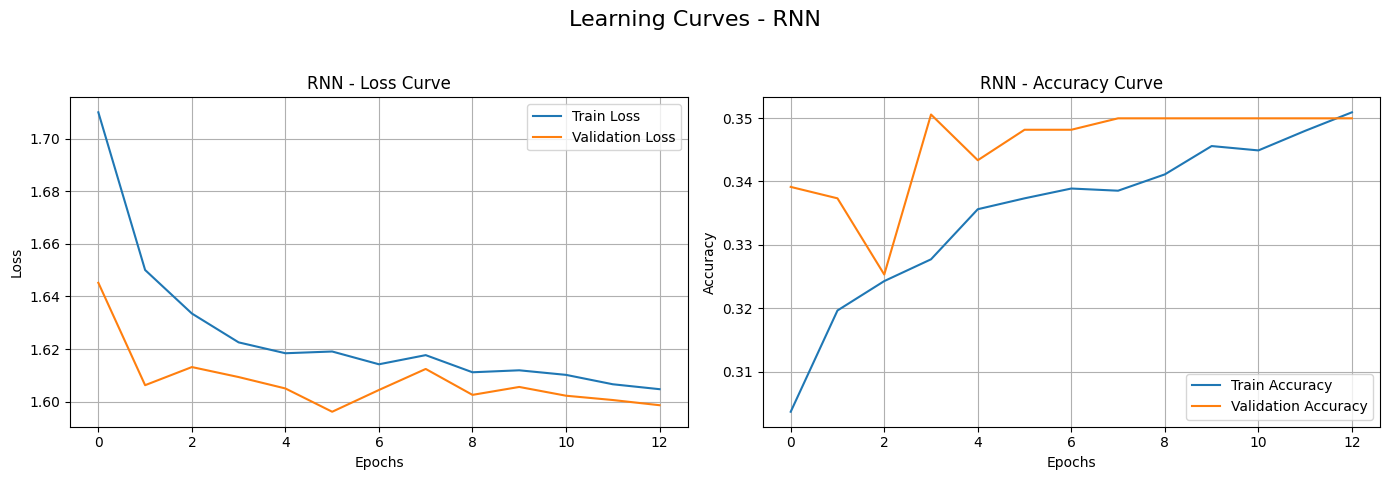

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Shape of y_true: (831, 1)
Shape of y_pred: (831, 7)
Shape of y_pred_classes: (831,)
Shape of y_true_np after flattening: (831,)


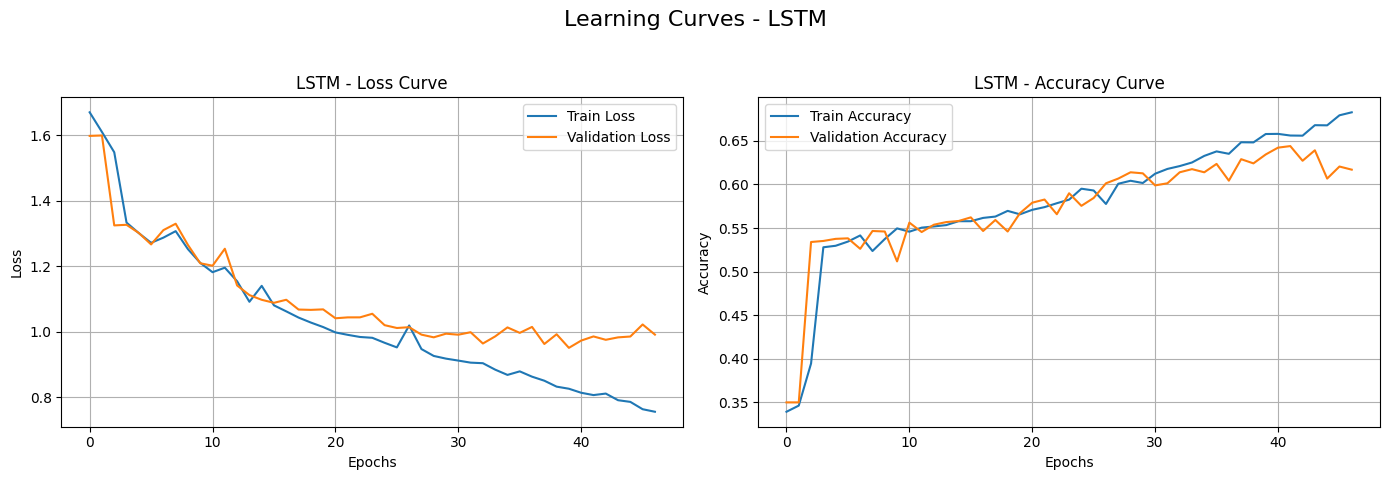

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Shape of y_true: (831, 1)
Shape of y_pred: (831, 7)
Shape of y_pred_classes: (831,)
Shape of y_true_np after flattening: (831,)


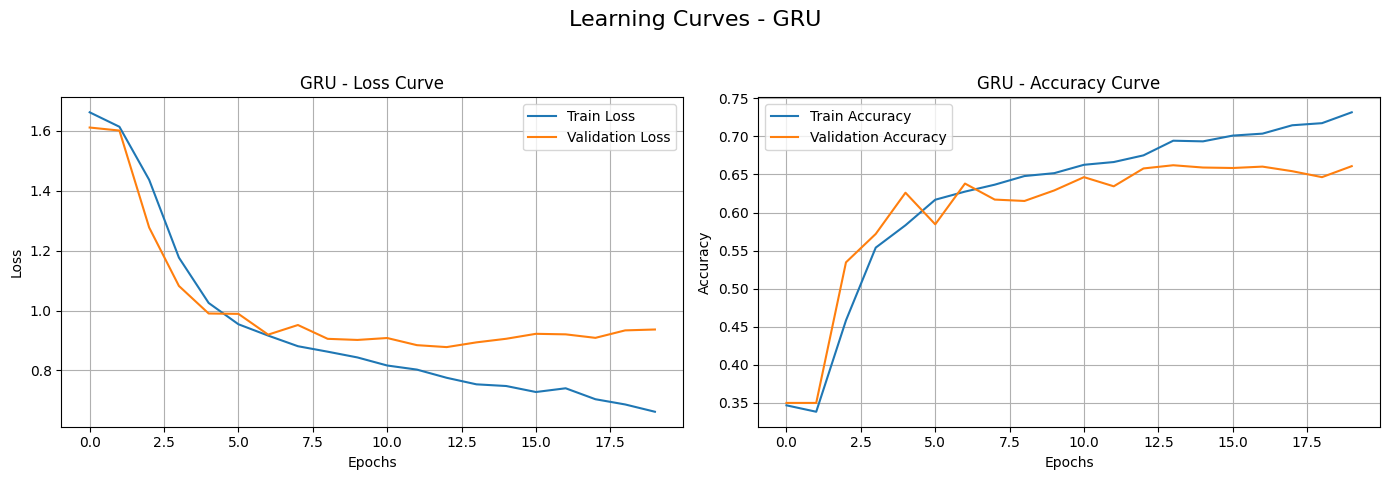

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Shape of y_true: (831, 1)
Shape of y_pred: (831, 7)
Shape of y_pred_classes: (831,)
Shape of y_true_np after flattening: (831,)


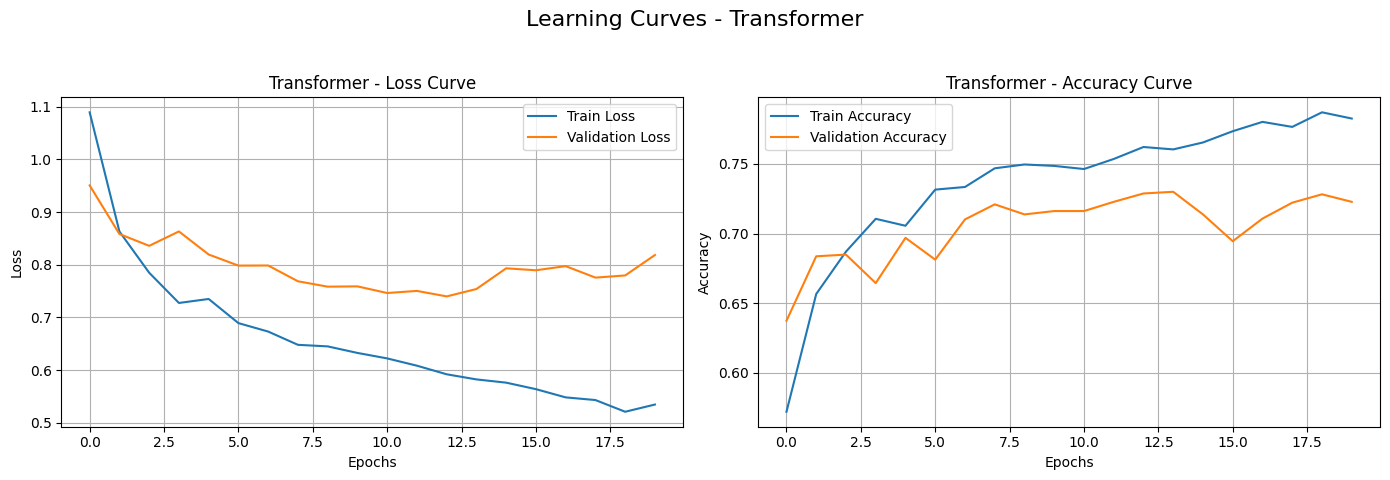


Comparison of Models:
         Model  Accuracy  Precision    Recall  F1-score  Training Time (s)  \
0          RNN  0.347774   0.183807  0.347774  0.187435         152.913167   
1         LSTM  0.642599   0.621655  0.642599  0.620611         421.375515   
2          GRU  0.648616   0.612015  0.648616  0.625209         186.671074   
3  Transformer  0.744886   0.751907  0.744886  0.738918         138.879217   

   CPU Usage (%)  Memory Usage (MB)  
0           40.7        3950.683594  
1           49.3        4114.082031  
2           45.5        4213.367188  
3           36.1        4440.191406  


In [ ]:
import time
import pandas as pd
from tensorflow.keras import backend as K
import gc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np # Import numpy
import os # Import the os module


# Example function to calculate metrics
def calculate_metrics(y_true, y_pred):
  print("Shape of y_true:", y_true.shape) # Added for debugging
  print("Shape of y_pred:", y_pred.shape) # Added for debugging

  # Convert softmax probabilities to predicted class index
  # Get the index of the maximum probability for each sample
  y_pred_classes = np.argmax(y_pred, axis=1)
  print("Shape of y_pred_classes:", y_pred_classes.shape) # Added for debugging

  # Ensure y_true is in a compatible NumPy format
  # Convert TensorFlow tensor to NumPy array if necessary
  if isinstance(y_true, tf.Tensor):
      y_true_np = y_true.numpy()
  else:
      y_true_np = y_true

  # Reshape y_true_np if it's (N, 1) to (N,) for sklearn metrics
  if y_true_np.shape[-1] == 1:
      y_true_np = y_true_np.flatten()

  print("Shape of y_true_np after flattening:", y_true_np.shape) # Added for debugging


  # Now both y_true_np and y_pred_classes are 1D arrays of class labels
  accuracy = accuracy_score(y_true_np, y_pred_classes)
  # For precision, recall, and f1-score, use average='weighted' or 'macro' for multiclass
  # Use zero_division=0 to handle cases where there are no true or predicted samples for a class
  precision = precision_score(y_true_np, y_pred_classes, average='weighted', zero_division=0)
  recall = recall_score(y_true_np, y_pred_classes, average='weighted', zero_division=0)
  # Renamed the local variable to avoid conflict
  f1_score_val = f1_score(y_true_np, y_pred_classes, average='weighted', zero_division=0)

  return accuracy, precision, recall, f1_score_val # Return the new variable name

nn_results = []
nn_preds = {}

'''# Define a directory to save checkpoints
checkpoint_dir = '/content/drive/MyDrive/Colab Notebooks/checkpoints'
# Create the directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

'''
for name, model in nn_models.items():
    K.clear_session()  # Clear the current Keras session to free up memory
    gc.collect()  # Collect garbage to free up memory

    start_time = time.time()

    callback = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      restore_best_weights=True
    )
    # Define the filepath for the checkpoint
    # Use a f-string to include the model name
    # filepath = os.path.join(checkpoint_dir, f'{name}_best_weights.h5')

    filepath = '/content/drive/MyDrive/Colab Notebooks/checkpoints/model_best.weights.h5'

    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=filepath,           # Provide the filepath
      monitor='val_loss',              # Metric to monitor
      save_best_only=True,             # Only save the best model
      save_weights_only=True,          # Save only weights (not full model architecture)
      mode='min',                      # 'min' because we want to minimize val_loss
      verbose=0                        # Set verbose to 0 to avoid excessive output during training
    )

    history = model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[callback, checkpoint_callback], verbose=0, validation_data=(X_val, y_val))
    y_pred = model.predict(X_test)

    accuracy, precision, recall, f1_score_val = calculate_metrics(y_test, y_pred)

    # Calculate training time (this should be for the fit operation)
    training_time = time.time() - start_time # This includes prediction time as well, refine if needed

    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / (1024 ** 2)

    # Store results
    nn_results.append([name, accuracy, precision, recall, f1_score_val, training_time, cpu_usage, memory_usage])

    # Store the predicted class labels, not the probabilities
    nn_preds[name] = np.argmax(y_pred, axis=1)


    # Tracer la courbe d'apprentissage : perte et précision
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Courbe de perte (loss)
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title(f'{name} - Loss Curve')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # Courbe de précision (accuracy)
    if 'accuracy' in history.history:  # Vérifie si accuracy est disponible
        axs[1].plot(history.history['accuracy'], label='Train Accuracy')
        axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axs[1].set_title(f'{name} - Accuracy Curve')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend()
        axs[1].grid(True)

    plt.suptitle(f'Learning Curves - {name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# 🔹 Combine results into a table 🔹
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Training Time (s)', 'CPU Usage (%)', 'Memory Usage (MB)']
results_df = pd.DataFrame(nn_results, columns=columns)

# 🔹 Display results table 🔹
print("\nComparison of Models:")
print(results_df)

<ipython-input-36-b5d545c22799>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')


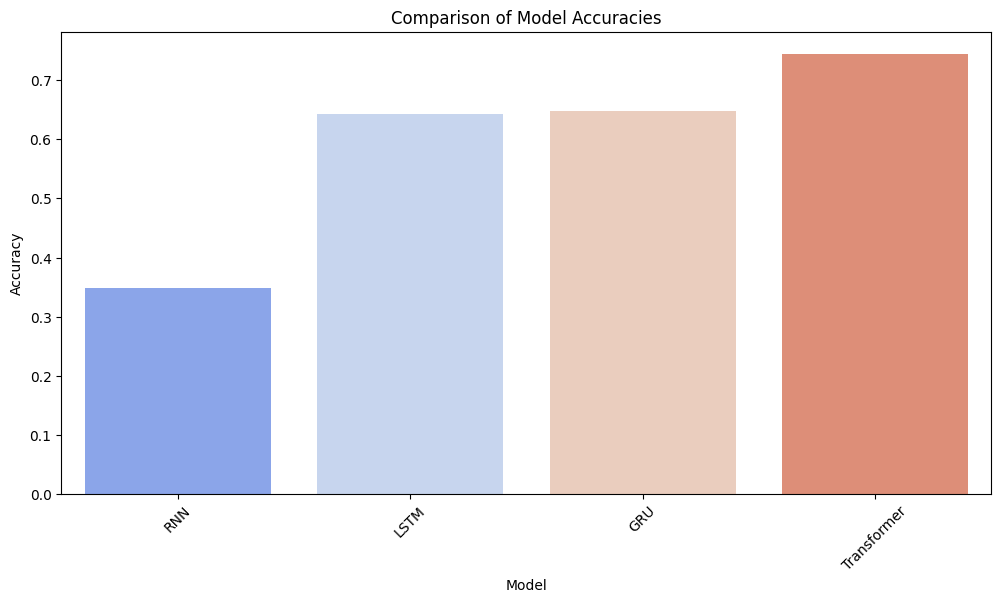

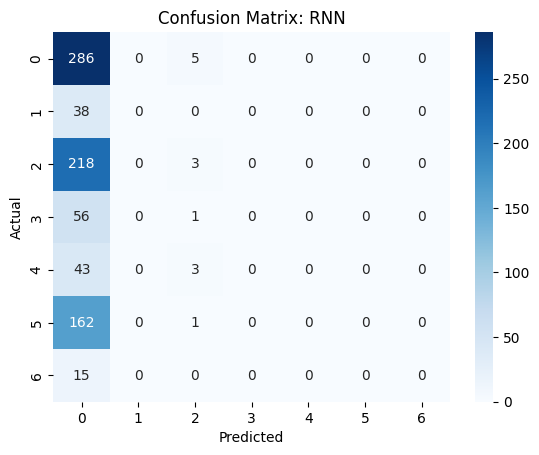

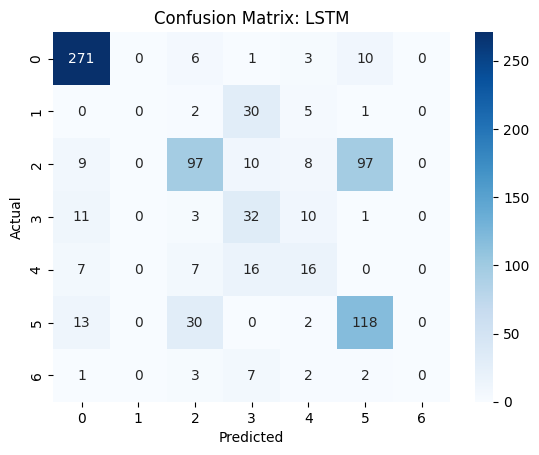

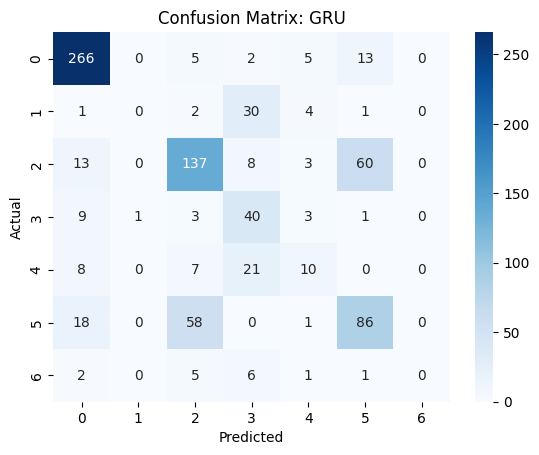

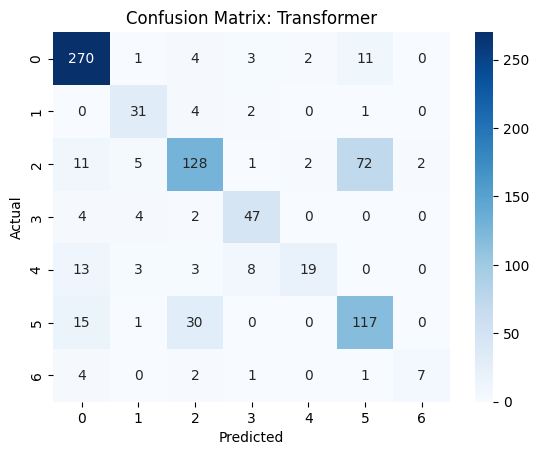

In [ ]:
# 📊 Visualizations 📊
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Comparison of Model Accuracies')
plt.show()

# 🔹 Confusion Matrix 🔹
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model, preds in {**nn_preds}.items():
    plot_confusion_matrix(y_test, preds, model)

In [ ]:
'''# ROC Curves
plt.figure(figsize=(12,6))
for model, preds in {**nn_preds}.items():
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f"{model} (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()'''

'# ROC Curves\nplt.figure(figsize=(12,6))\nfor model, preds in {**nn_preds}.items():\n    fpr, tpr, _ = roc_curve(y_test, preds)\n    plt.plot(fpr, tpr, label=f"{model} (AUC: {auc(fpr, tpr):.2f})")\nplt.plot([0,1],[0,1],\'k--\')\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC Curves for Models\')\nplt.legend()\nplt.show()'

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
'''
# Paramètres
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Pour stocker les F1-scores
f1_rnn_scores = []
f1_lstm_scores = []
f1_gru_scores = []
f1_transformer_scores = []


# Cross-validation
for train_index, test_index in kf.split(X_padded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for model_builder, f1_list in [
        (build_rnn, f1_rnn_scores),
        (build_lstm, f1_lstm_scores),
        (build_gru, f1_gru_scores),
        (build_transformer, f1_transformer_scores),
    ]:
        model = model_builder(X.shape[1:])
        model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=0)
        y_pred = np.argmax(model.predict(X_test), axis=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_list.append(f1)
        print(f"{model_builder.__name__}: Fold F1-score = {f1:.4f}")'''

# Convert target variable to numpy array if it's a pandas Series
if isinstance(y, pd.Series):
    y_np = y.to_numpy()
else:
    y_np = y

# Paramètres
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Pour stocker les F1-scores
# f1_rnn_scores = []
# f1_lstm_scores = []
# f1_gru_scores = []
f1_transformer_scores = []

# Cross-validation
# Use X_padded and y_np for splitting
for fold, (train_index, test_index) in enumerate(kf.split(X_padded, y_np)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split the padded data (NumPy array) and the target (NumPy array)
    X_train_fold, X_test_fold = X_padded[train_index], X_padded[test_index]
    y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]

    # Convert to TensorFlow tensors with appropriate dtypes
    X_train_fold_tf = tf.convert_to_tensor(X_train_fold, dtype=tf.float32)
    X_test_fold_tf = tf.convert_to_tensor(X_test_fold, dtype=tf.float32)
    # y should be int for sparse_categorical_crossentropy
    y_train_fold_tf = tf.convert_to_tensor(y_train_fold, dtype=tf.int32)
    y_test_fold_tf = tf.convert_to_tensor(y_test_fold, dtype=tf.int32)


    # (build_rnn, f1_rnn_scores),
    # (build_lstm, f1_lstm_scores),
    # (build_gru, f1_gru_scores),

    for model_builder, f1_list in [(build_transformer, f1_transformer_scores)]:
        # Clear previous session and collect garbage for each model in each fold
        tf.keras.backend.clear_session()
        import gc
        gc.collect()

        # Build the model. The input shape should match the data shape (sequence_length, features)
        # X_padded.shape is (samples, sequence_length, features)
        # So the input_shape for the model is (sequence_length, features)
        # For RNNs/LSTMs/GRUs, it's common to use (None, features) for variable length sequences,
        # but since we padded to a fixed max_length, (max_length, features) is also valid.
        # Let's use the fixed padded shape: (X_padded.shape[1], X_padded.shape[2])
        model = model_builder(input_shape=(X_padded.shape[1], X_padded.shape[2]))

        # Train the model on the current fold's training data
        # Add EarlyStopping for better training
        callback = tf.keras.callbacks.EarlyStopping(
            monitor='loss', # Monitor training loss for simplicity in CV fold
            patience=5,
            restore_best_weights=True
        )
        history = model.fit(X_train_fold_tf, y_train_fold_tf, epochs=50, batch_size=32, verbose=0, callbacks=[callback]) # Increased epochs and batch size slightly

        # Predict on the current fold's test data
        y_pred_prob = model.predict(X_test_fold_tf)
        y_pred = np.argmax(y_pred_prob, axis=1) # Get class predictions from probabilities

        # Calculate F1-score for the current fold
        # Ensure y_test_fold is a 1D numpy array for f1_score
        if isinstance(y_test_fold, tf.Tensor):
             y_test_fold_np = y_test_fold.numpy().flatten()
        else:
             y_test_fold_np = y_test_fold.flatten()


        f1 = f1_score(y_test_fold_np, y_pred, average='weighted')
        f1_list.append(f1)
        print(f"  {model_builder.__name__}: Fold F1-score = {f1:.4f}")

# Print average F1-scores after cross-validation
print("\nAverage F1-scores across all folds:")
# print(f"RNN: {np.mean(f1_rnn_scores):.4f}")
# print(f"LSTM: {np.mean(f1_lstm_scores):.4f}")
# print(f"GRU: {np.mean(f1_gru_scores):.4f}")
print(f"Transformer: {np.mean(f1_transformer_scores):.4f}")

--- Fold 1/5 ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
  build_transformer: Fold F1-score = 0.7409
--- Fold 2/5 ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
  build_transformer: Fold F1-score = 0.7256
--- Fold 3/5 ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
  build_transformer: Fold F1-score = 0.7255
--- Fold 4/5 ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
  build_transformer: Fold F1-score = 0.7298
--- Fold 5/5 ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
  build_transformer: Fold F1-score = 0.7201

Average F1-scores across all folds:
Transformer: 0.7284


In [ ]:
f1_transformer_scores

[0.7408882124579732,
 0.7256231486887617,
 0.7255255510232195,
 0.7298228587937461,
 0.7200904009198155]

#F1-Score over 5 folds of the two best models

In [ ]:
f1_transformer_scores = [0.7308021458467694, 0.7185275324425403, 0.7173566480678639, 0.725256550306477, 0.6901625284483534]
f1_SVM_linear_score = [0.4877605842312221, 0.4886434392971203, 0.4976056475379689, 0.4595589077630203, 0.47927383164672605]

# Shapiro test to observe the normality:

In [ ]:
from scipy.stats import shapiro

# Étape 1 : calcul des différences
differences = [transformer - svm_linear for transformer, svm_linear in zip(f1_transformer_scores, f1_SVM_linear_score)]

# Étape 2 : test de Shapiro-Wilk
stat, p_value = shapiro(differences)

print(f"Statistique de Shapiro = {stat:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("✅ Les différences suivent une loi normale (on peut utiliser le t-test).")
else:
    print("❌ Les différences ne suivent pas une loi normale (préférer le test de Wilcoxon).")


Statistique de Shapiro = 0.9607, p-value = 0.8129
✅ Les différences suivent une loi normale (on peut utiliser le t-test).


# t-test

In [ ]:
from scipy.stats import ttest_rel

t_test = ttest_rel(f1_transformer_scores, f1_SVM_linear_score)
print("\nPaired t-test:", t_test)
# Ex : f1_scores_rnn et f1_scores_lstm sont des listes de F1-scores sur k-folds
t_stat = t_test.statistic
p_value = t_test.pvalue

print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.6f}")
if p_value < 0.05:
    print("Différence significative entre les modèles.")
else:
    print("Pas de différence significative.")



Paired t-test: TtestResult(statistic=24.377581357884353, pvalue=1.6800893780515997e-05, df=4)
t-statistic = 24.3776, p-value = 0.000017
Différence significative entre les modèles.
